In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sl
from sklearn.model_selection import TimeSeriesSplit

In [70]:
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [72]:
internet_data = pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [73]:
#Merge all the 3 data frames
df = pd.merge(churn_data,customer_data, how= 'inner',on= 'customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [74]:
telecom = pd.merge(df , internet_data , how= 'inner' , on= 'customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [75]:
telecom.shape

(7043, 21)

In [76]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [77]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [78]:
# WE need to conver yes or no type variables in 1 and 0's
varlist = ['PhoneService' , 'PaperlessBilling' , 'Partner' , 'Churn', 'Dependents']

In [79]:
#create function
def con(x):
    return x.map({'Yes':1,'No':0})

In [80]:
#Apply function
telecom[varlist] = telecom[varlist].apply(con)

In [81]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [82]:
#Create dummy variables for cotegorical columns
dummy = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

In [83]:
#merge dummy and main data frame
telecom = pd.concat([telecom,dummy],axis=1)

In [84]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [85]:
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

In [86]:
# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [87]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [88]:
#Drop originals which was created dummies before
telecom = telecom.drop(['Contract','PaymentMethod','gender','InternetService'], axis= 1)

In [89]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  MultipleLines                          7043 non-null   object 
 11  Onli

In [90]:
telecom = telecom.drop(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],axis = 1)

In [91]:
telecom = telecom[~(telecom['TotalCharges']==' ')]

In [92]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [93]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [94]:
telecom.isna().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [95]:
#Modelling part
telecom.drop('customerID', axis= 1, inplace= True)

In [96]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   PhoneService                           7032 non-null   int64  
 2   PaperlessBilling                       7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   SeniorCitizen                          7032 non-null   int64  
 7   Partner                                7032 non-null   int64  
 8   Dependents                             7032 non-null   int64  
 9   Contract_One year                      7032 non-null   uint8  
 10  Contract_Two year                      7032 non-null   uint8  
 11  Paym

In [97]:
#split
X = telecom.drop(['Churn'], axis= 1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [98]:
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [99]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size= 0.7,test_size=0.3,random_state=100)

In [100]:
#Scaling the features
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [171]:
#churn %
churn = (sum(telecom['Churn'])/len(telecom['Churn'])*100)

In [102]:
churn

26.578498293515356

<AxesSubplot:>

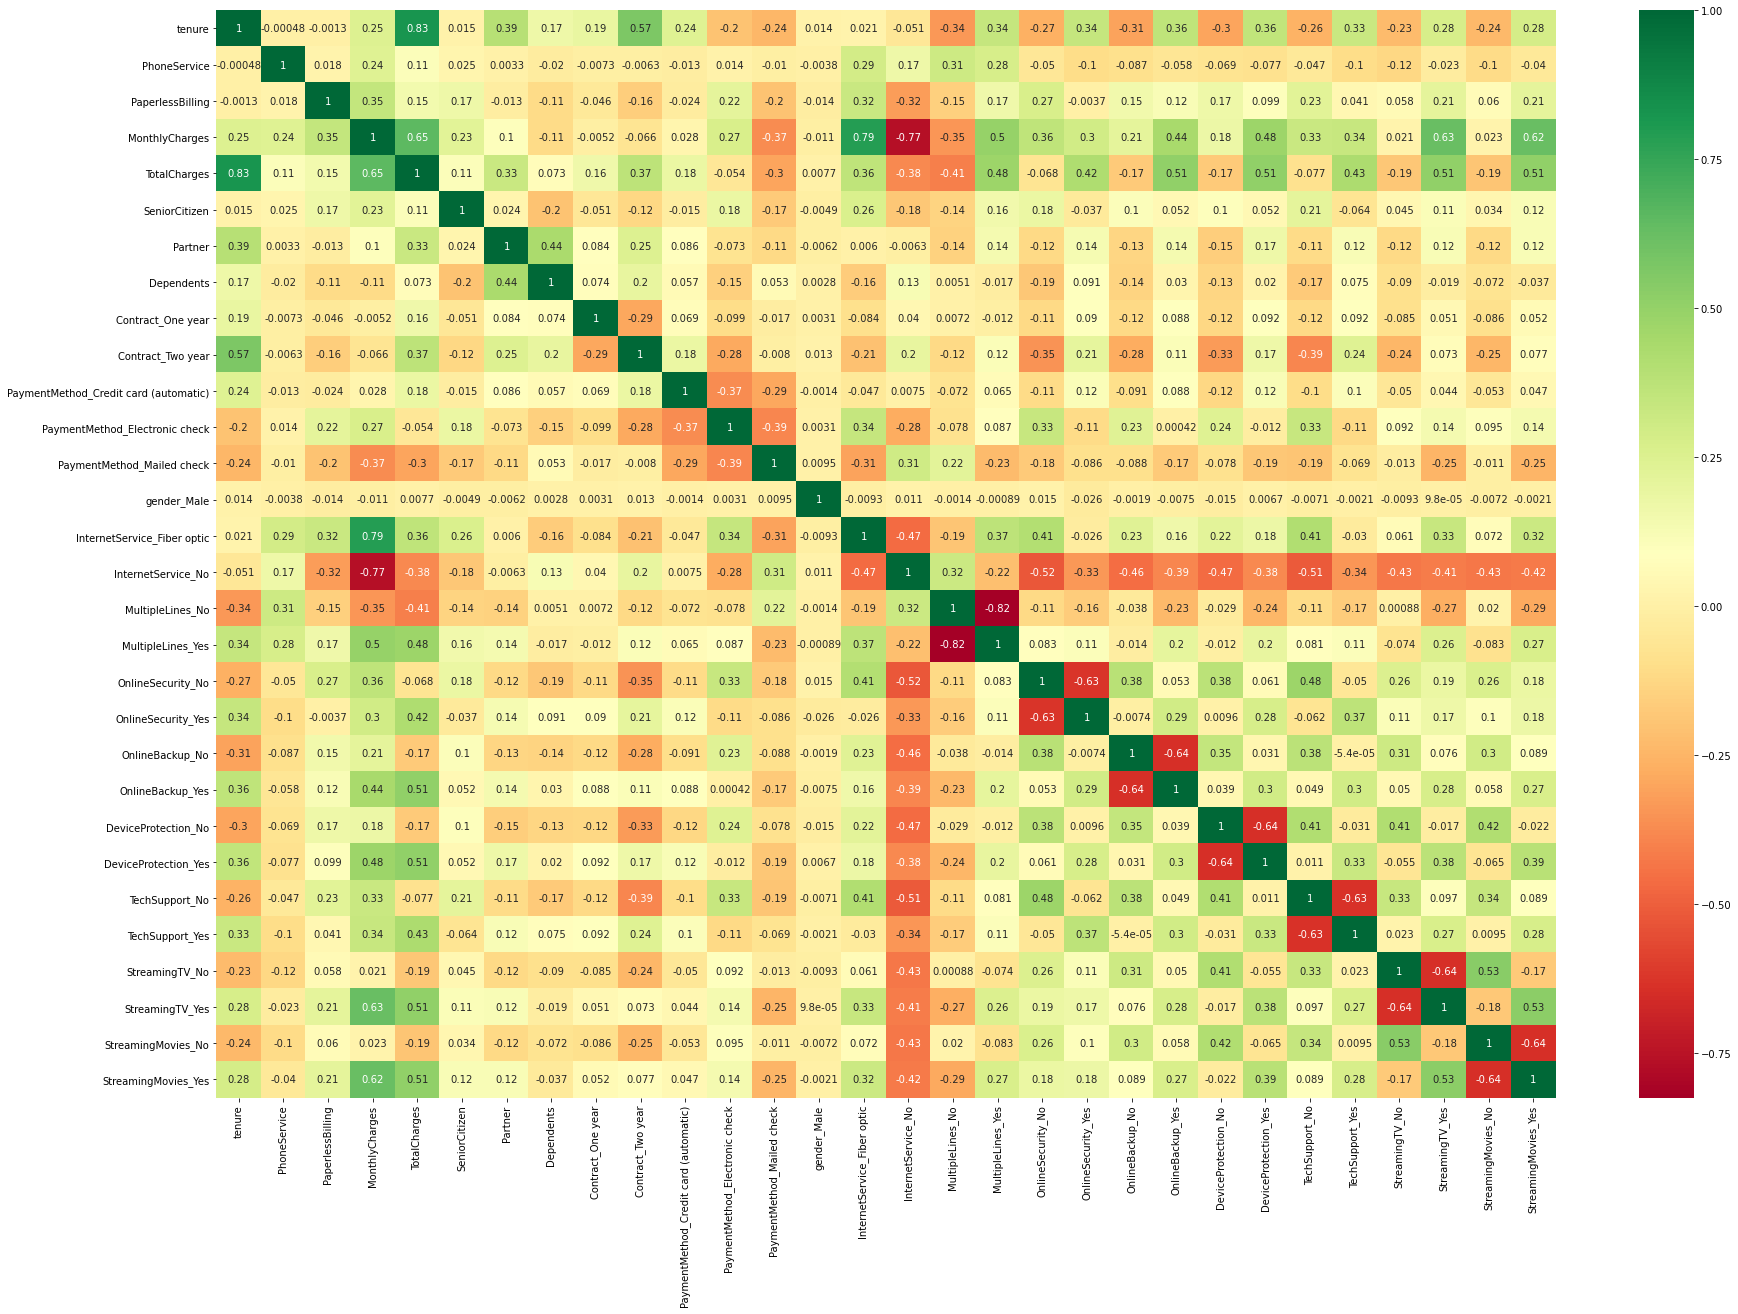

In [103]:
#Check for correlations
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot= True, cmap= 'RdYlGn')

In [104]:
#Dropping highly correlated dummy variables
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

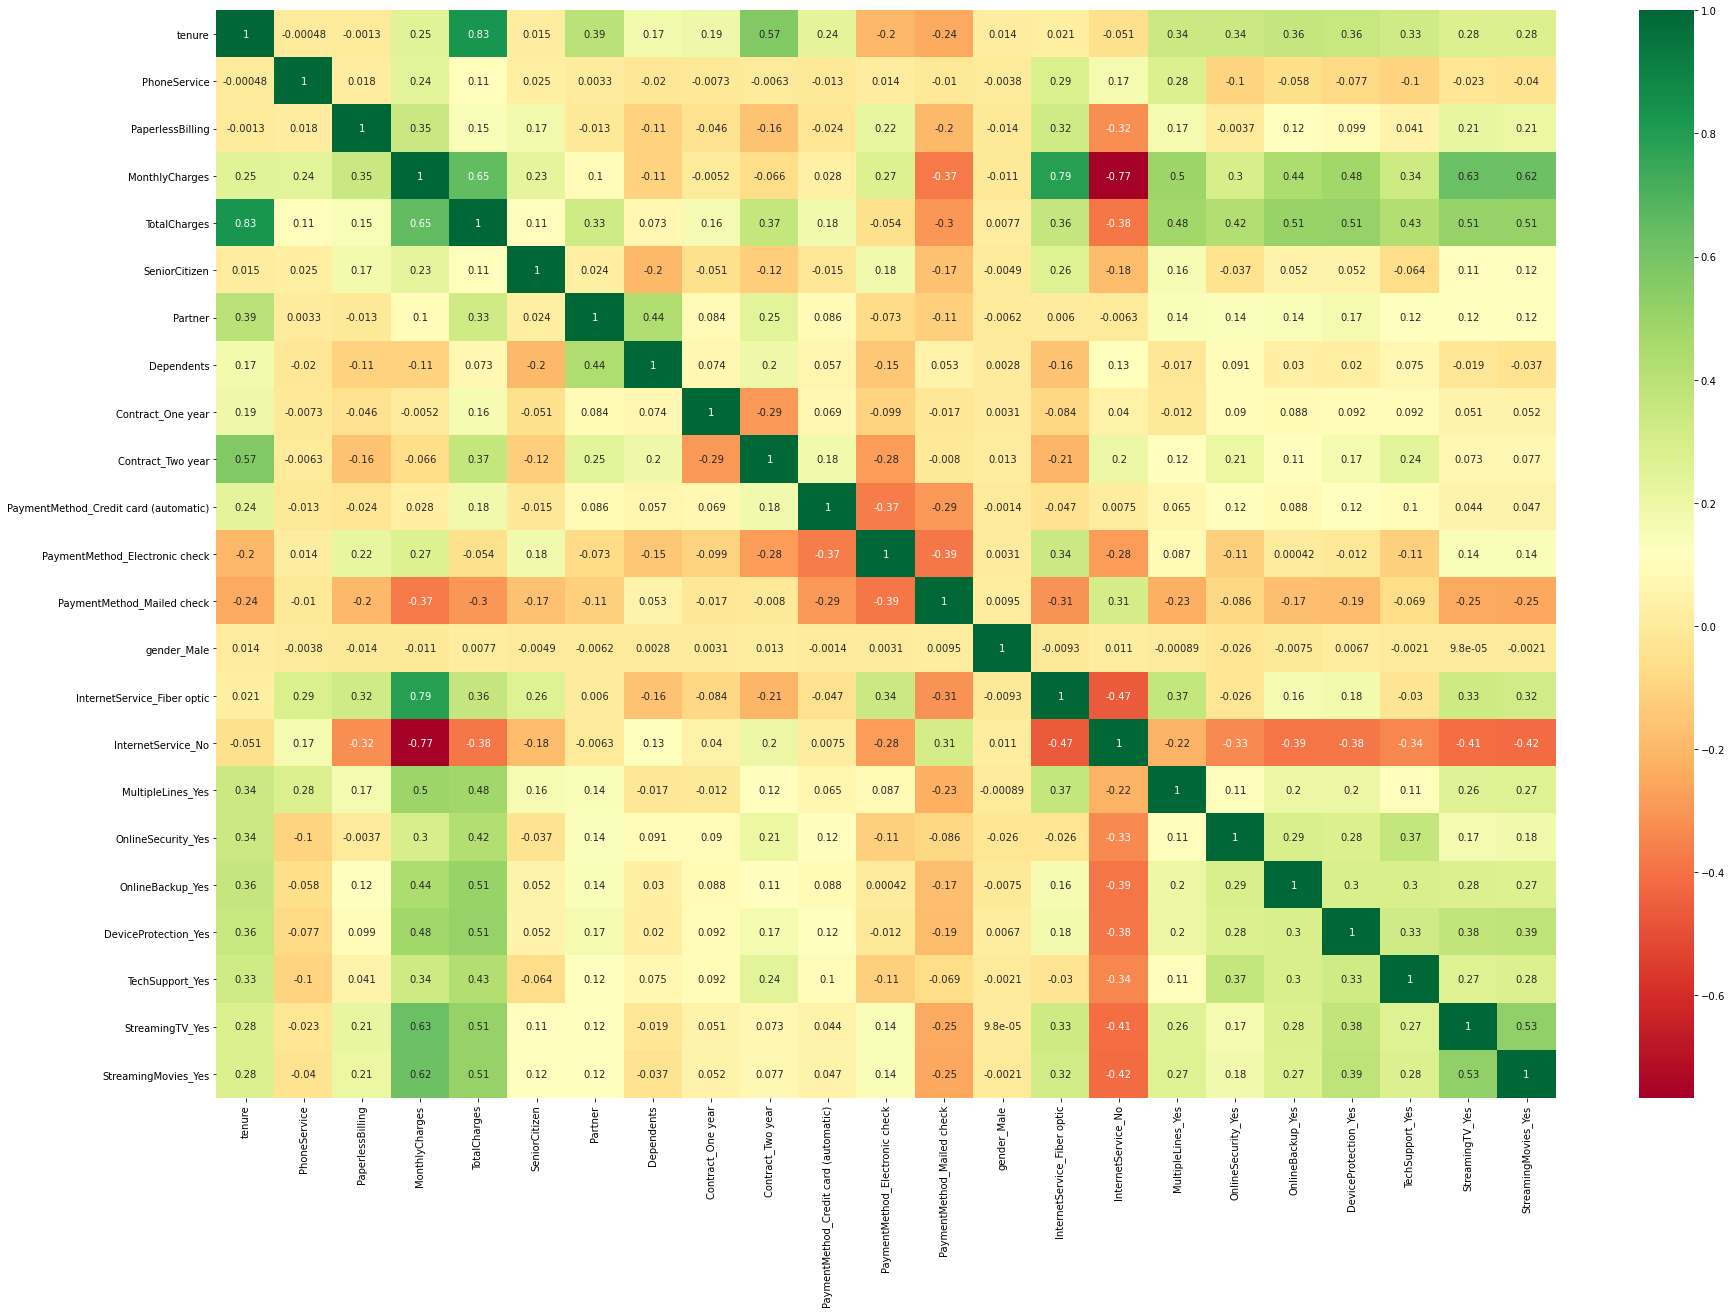

In [105]:
#Check for correlations
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot= True, cmap= 'RdYlGn')
plt.show()

In [106]:
#Model Building using statsmodel
import statsmodels.api as sm
logr1 = sm.GLM(y_train,(sm.add_constant(X_train)), family= sm.families.Binomial())
logr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 18 Aug 2022   Deviance:                       4009.4
Time:                        10:27:51   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [107]:
#Feature elimination using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [108]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)
rfe = rfe.fit(X_train,y_train)

In [109]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [110]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [111]:
col = X_train.columns[rfe.support_]

In [112]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [113]:
X_train_sm = sm.add_constant(X_train[col])

In [114]:
logreg2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

In [115]:
res = logreg2.fit()

In [116]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Thu, 18 Aug 2022   Deviance:                       4022.2
Time:                        10:27:52   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [117]:
y_train_pred = res.predict(X_train_sm)

In [137]:
pred = pd.DataFrame({'Y_Actual':y_train,'Y_Train_pred_Prob':y_train_pred})

In [138]:
pred['Y_train_pred'] = pred['Y_Train_pred_Prob'].apply(lambda x : 1 if x > 0.5 else 0)

In [139]:
pred.head()

,Y_Actual,Y_Train_pred_Prob,Y_train_pred
879,0,0.192642,0
5790,0,0.275624,0
6498,1,0.599507,1
880,1,0.513571,1
2784,1,0.648233,1


In [140]:
from sklearn import metrics

In [141]:
confusion = metrics.confusion_matrix(pred['Y_Actual'],pred['Y_train_pred'])

In [142]:
confusion

array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [143]:
print(metrics.accuracy_score(pred['Y_Actual'],pred['Y_train_pred']))

0.8102397399431126


In [144]:
#Sensitivity and specificity
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [145]:
#Sensitivity
print('sensitivity = ', TP / float(TP+FN))

sensitivity =  0.554001554001554


In [146]:
#Specificity
print('Specificity =', TN / float(TN+FP))

Specificity = 0.9009628610729024


In [147]:
#True Positive Rate TPR
TPR = TP / float(TP+FN)

In [148]:
#False Positive Rate FPR


In [149]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, threshold = metrics.roc_curve(pred['Y_Actual'],pred['Y_train_pred'],drop_intermediate= False)

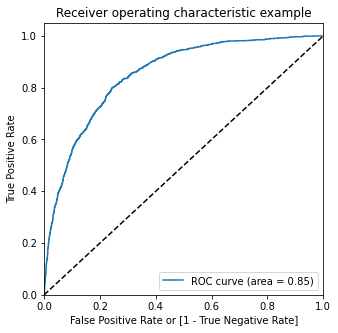

In [151]:
draw_roc(pred['Y_Actual'],pred['Y_Train_pred_Prob'])

In [152]:
#Finding Optimal cutoff/Threshold probability
numbers = [float(x)/10 for x in range(0,10)]

In [154]:
for i in numbers:
    pred[i] = pred.Y_Train_pred_Prob.map(lambda x : 1 if x>i else 0)

In [155]:
pred.head()

,Y_Actual,Y_Train_pred_Prob,Y_train_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.192642,0,1,1,0,0,0,0,0,0,0,0
5790,0,0.275624,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.599507,1,1,1,1,1,1,1,0,0,0,0
880,1,0.513571,1,1,1,1,1,1,1,0,0,0,0
2784,1,0.648233,1,1,1,1,1,1,1,1,0,0,0


In [156]:
cutoff_df = pd.DataFrame(columns= ['Prob','Accuracy','Sensitivity','Specificity'])

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
for i in numbers:
    cm1 = confusion_matrix(pred.Y_Actual,pred[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.261479     1.000000     0.000000
0.1   0.1  0.619057     0.946387     0.503164
0.2   0.2  0.716782     0.867133     0.663549
0.3   0.3  0.771231     0.777001     0.769188
0.4   0.4  0.792767     0.672106     0.835488
0.5   0.5  0.810240     0.554002     0.900963
0.6   0.6  0.804145     0.393162     0.949656
0.7   0.7  0.778342     0.195804     0.984594
0.8   0.8  0.747257     0.039627     0.997799
0.9   0.9  0.738521     0.000000     1.000000


<AxesSubplot:xlabel='Prob'>

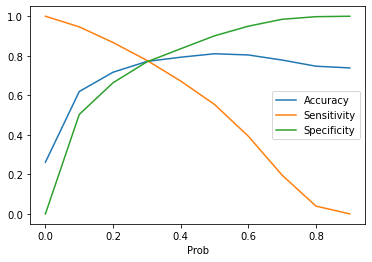

In [159]:
cutoff_df.plot.line(x = 'Prob', y = ['Accuracy','Sensitivity','Specificity'])


In [160]:
# From Above graph its found that the 0.3 Threshold is optimal for predictions
pred['Final_prediction'] = pred.Y_Train_pred_Prob.map(lambda x: 1 if x>0.3 else 0 )

In [161]:
pred.head()

,Y_Actual,Y_Train_pred_Prob,Y_train_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_prediction
879,0,0.192642,0,1,1,0,0,0,0,0,0,0,0,0
5790,0,0.275624,0,1,1,1,0,0,0,0,0,0,0,0
6498,1,0.599507,1,1,1,1,1,1,1,0,0,0,0,1
880,1,0.513571,1,1,1,1,1,1,1,0,0,0,0,1
2784,1,0.648233,1,1,1,1,1,1,1,1,0,0,0,1


In [162]:
metrics.accuracy_score(pred['Y_Actual'],pred['Final_prediction'])

0.7712312068264933

In [163]:
confusion2 = confusion_matrix(pred['Y_Actual'],pred['Final_prediction'])

In [164]:
confusion2

array([[2796,  839],
       [ 287, 1000]], dtype=int64)

In [165]:
TP2 = confusion2[1,1]
TN2 = confusion2[0,0]
FP2 = confusion2[0,1]
FN2 = confusion2[1,0]

In [166]:
#Sensitivity
print('sensitivity2 = ', TP2 / float(TP2+FN2))

sensitivity2 =  0.777000777000777


In [167]:
#Specificity
print('Specificity2 =', TN2 / float(TN2+FP2))

Specificity2 = 0.7691884456671252


In [168]:
#Precision and Recall
# 1. Precision = TP/TP+FP
TP2/float(TP2+FP2)

0.5437737901033171

In [170]:
#2. Recall
TP2/float(TP2+FN2)

0.777000777000777

In [172]:
#Making preditions on test data set using sensitivity and Specificity

In [173]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [174]:
X_test = X_test[col]

In [175]:
X_test_sm = sm.add_constant(X_test)

In [176]:
y_tesy_pred = res.predict(X_test_sm)

In [177]:
Pred_test = pd.DataFrame(y_tesy_pred)

In [179]:
Pred_test.head()

,0
942,0.435436
3730,0.286097
1761,0.004253
2283,0.592438
1872,0.008149


In [180]:
Pred_test['Y_Actual'] = y_test

In [181]:
Pred_test.head()

,0,Y_Actual
942,0.435436,0
3730,0.286097,1
1761,0.004253,0
2283,0.592438,1
1872,0.008149,0


In [185]:
Pred_test.rename(columns={0 : 'Y_test_pred_Pob'},inplace= True)

In [186]:
Pred_test.head()

,Y_test_pred_Pob,Y_Actual
942,0.435436,0
3730,0.286097,1
1761,0.004253,0
2283,0.592438,1
1872,0.008149,0


In [187]:
Pred_test['Y_test_pred'] = Pred_test['Y_test_pred_Pob'].map(lambda x : 1 if x > 0.3 else 0)

In [188]:
Pred_test.head()

,Y_test_pred_Pob,Y_Actual,Y_test_pred
942,0.435436,0,1
3730,0.286097,1,0
1761,0.004253,0,0
2283,0.592438,1,1
1872,0.008149,0,0


In [189]:
#Accuracy for test data set
print('Accuracy_test=',metrics.accuracy_score(Pred_test['Y_Actual'],Pred_test['Y_test_pred']))

Accuracy_test= 0.7464454976303317


In [190]:
confusion_test = metrics.confusion_matrix(Pred_test['Y_Actual'],Pred_test['Y_test_pred'])

In [191]:
confusion_test

array([[1144,  384],
       [ 151,  431]], dtype=int64)